In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataset=pd.read_csv("./cardio_train.csv",delimiter=';')
dataset.shape



(70000, 13)

In [3]:
dataset.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [4]:
from sklearn.model_selection import train_test_split

# Assuming X is your feature matrix and y is your target variable
X = dataset.drop(columns=['cardio'])
y = dataset['cardio']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=32)

# Split the training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Print the shapes of the training, validation, and testing sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_val:", X_val.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_val:", y_val.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (44800, 12)
Shape of X_val: (11200, 12)
Shape of X_test: (14000, 12)
Shape of y_train: (44800,)
Shape of y_val: (11200,)
Shape of y_test: (14000,)


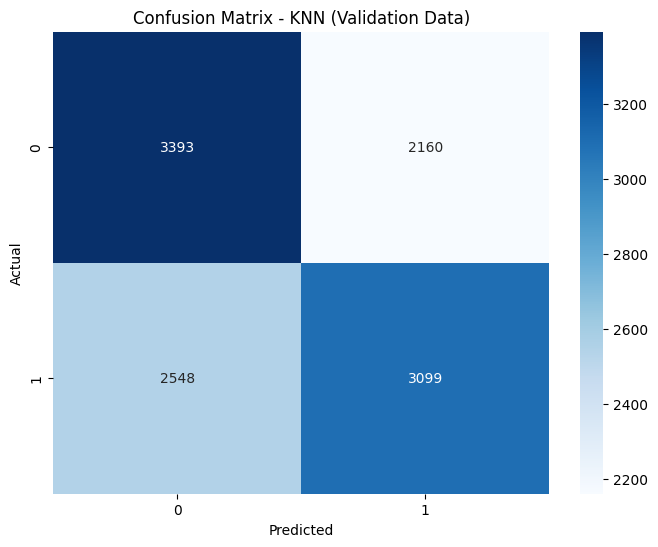

False Negative Percentage for KNN (Validation Data): 45.12%


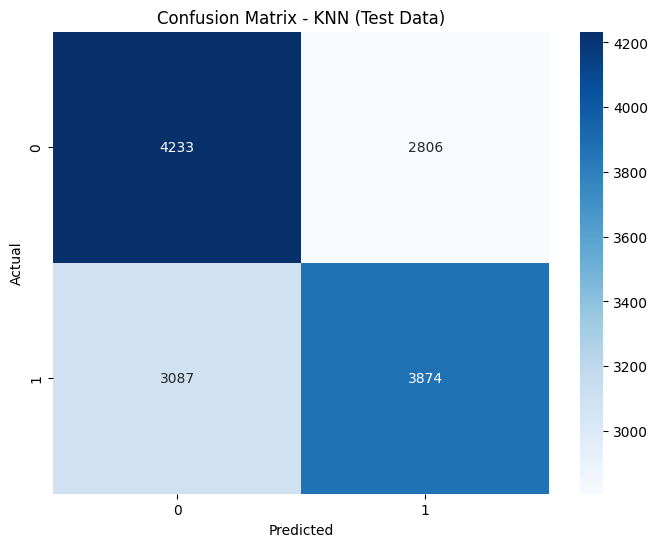

False Negative Percentage for KNN (Test Data): 44.35%


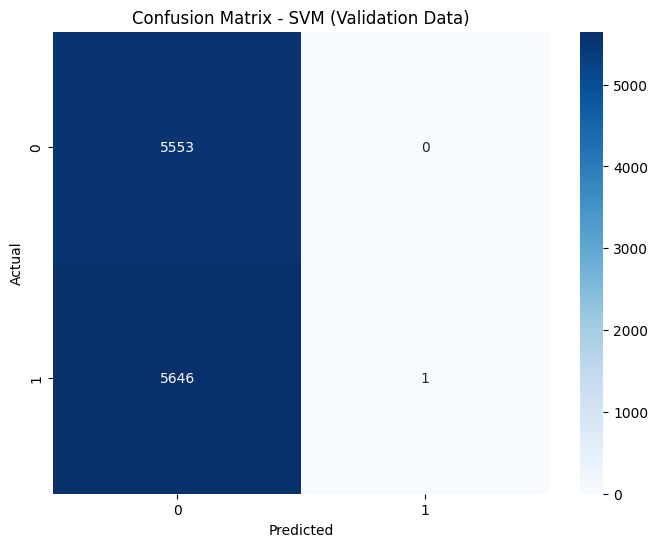

False Negative Percentage for SVM (Validation Data): 99.98%


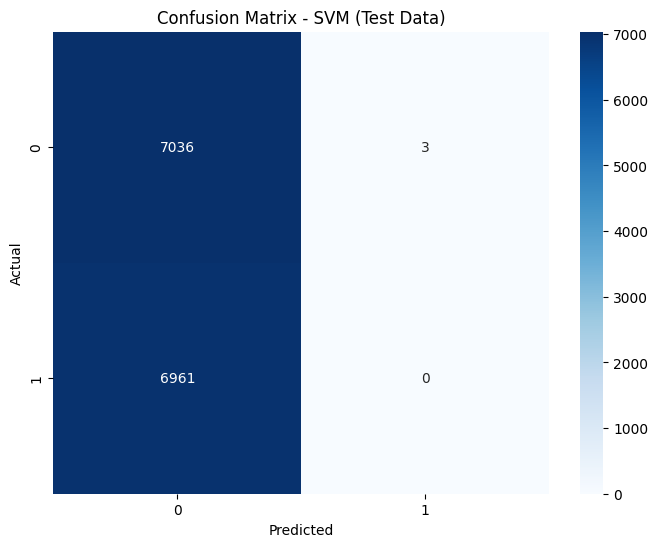

False Negative Percentage for SVM (Test Data): 100.00%


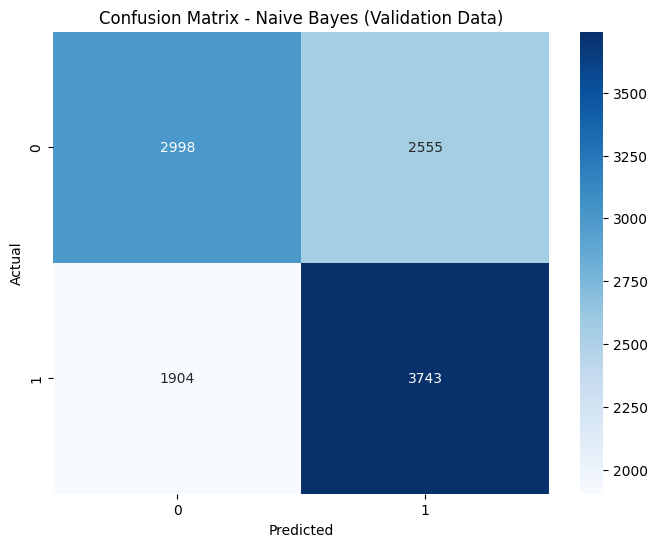

False Negative Percentage for Naive Bayes (Validation Data): 33.72%


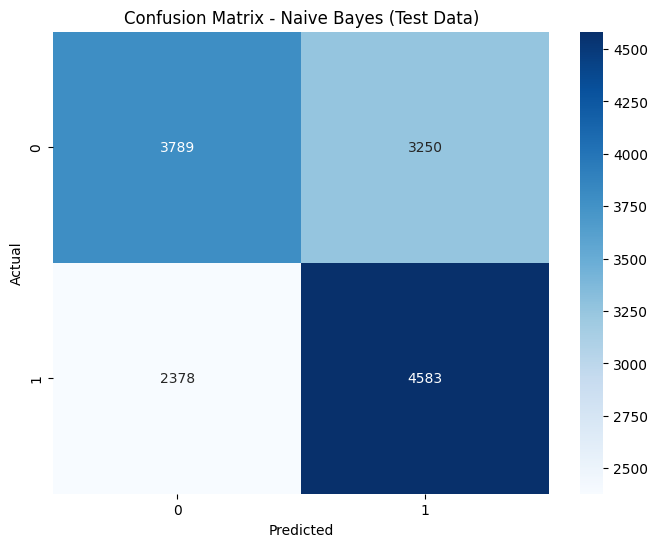

False Negative Percentage for Naive Bayes (Test Data): 34.16%


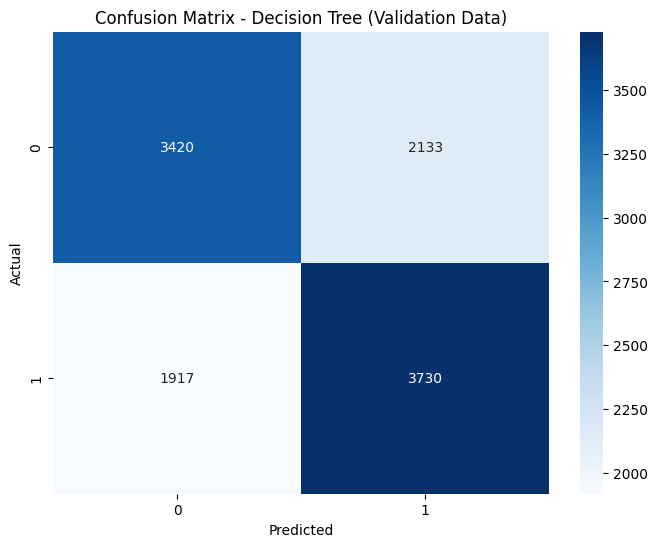

False Negative Percentage for Decision Tree (Validation Data): 33.95%


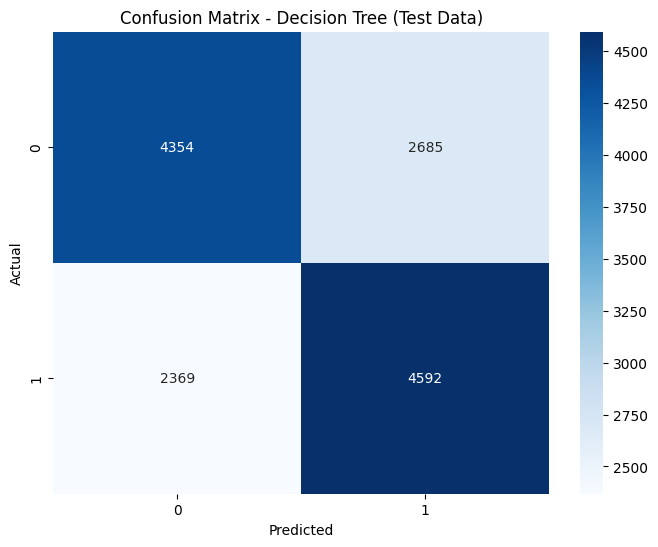

False Negative Percentage for Decision Tree (Test Data): 34.03%


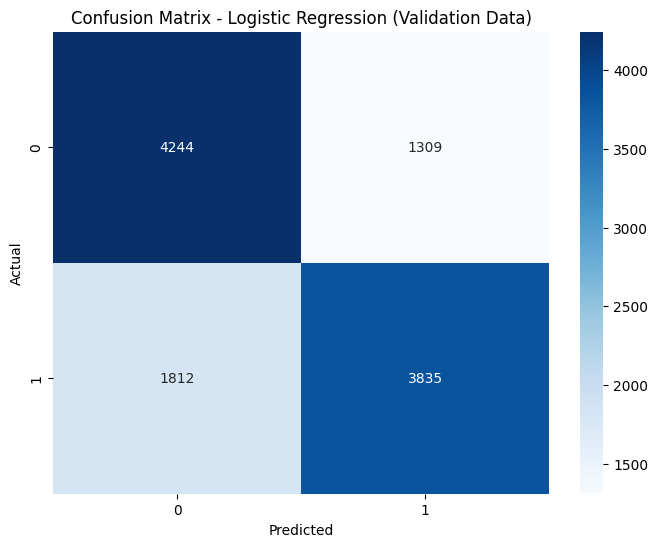

False Negative Percentage for Logistic Regression (Validation Data): 32.09%


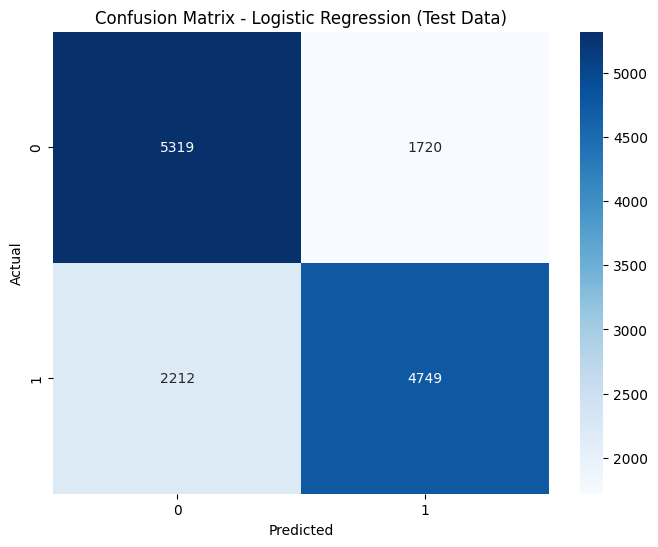

False Negative Percentage for Logistic Regression (Test Data): 31.78%


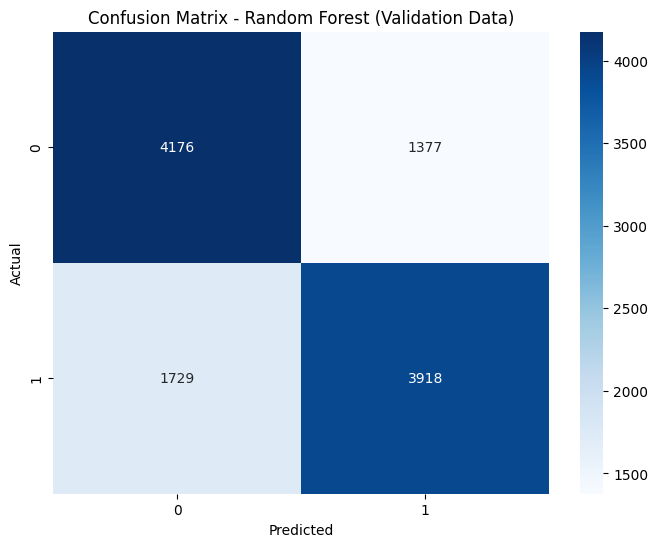

False Negative Percentage for Random Forest (Validation Data): 30.62%


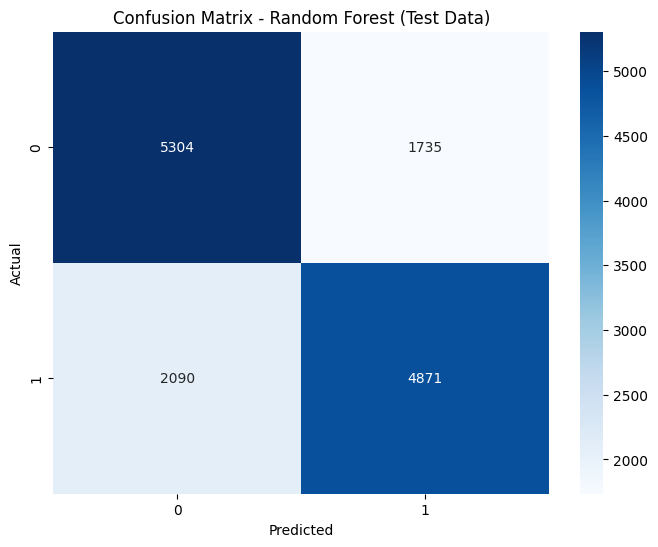

False Negative Percentage for Random Forest (Test Data): 30.02%
                 Model  Validation Accuracy  Validation Precision  \
0                  KNN             0.579643              0.580272   
1                  SVM             0.495893              0.750040   
2          Naive Bayes             0.601875              0.602879   
3        Decision Tree             0.638393              0.638482   
4  Logistic Regression             0.721339              0.723348   
5        Random Forest             0.722679              0.723708   

   Validation Recall  Validation F1 Score  Test Accuracy  Test Precision  \
0           0.579643             0.579260       0.579071        0.579105   
1           0.495893             0.328879       0.502571        0.252740   
2           0.601875             0.600329       0.598000        0.599826   
3           0.638393             0.638200       0.639000        0.639375   
4           0.721339             0.720882       0.719143        0.720121

In [5]:
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Initialize models
models = {
    "KNN": KNeighborsClassifier(metric='manhattan', n_neighbors=9, weights='distance'),
    "SVM": SVC(C=100, gamma='auto', probability=True),
    "Naive Bayes": GaussianNB(var_smoothing=0.004328761281083057),
    "Decision Tree": DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=5, splitter='random'),
    "Logistic Regression": LogisticRegression(C=0.615848211066026, max_iter=500, penalty='l1', solver='liblinear'),
    "Random Forest": RandomForestClassifier(criterion='entropy',max_features='sqrt')
}

# Initialize lists to store results
results = {'Model': [], 'Validation Accuracy': [], 'Validation Precision': [], 
           'Validation Recall': [], 'Validation F1 Score': [],
           'Test Accuracy': [], 'Test Precision': [], 'Test Recall': [], 'Test F1 Score': []}

# Function to evaluate model performance
def evaluate_model(model, X_train, y_train, X_val, y_val, X_test, y_test):
    # Fit the model
    model.fit(X_train, y_train)
    
    # Predict on validation set
    val_predictions = model.predict(X_val)
    
    # Predict on test set
    test_predictions = model.predict(X_test)
    
    # Calculate metrics for validation set
    val_accuracy = accuracy_score(y_val, val_predictions)
    val_precision = precision_score(y_val, val_predictions, average='weighted')
    val_recall = recall_score(y_val, val_predictions, average='weighted')
    val_f1 = f1_score(y_val, val_predictions, average='weighted')
    
    # Calculate metrics for test set
    test_accuracy = accuracy_score(y_test, test_predictions)
    test_precision = precision_score(y_test, test_predictions, average='weighted')
    test_recall = recall_score(y_test, test_predictions, average='weighted')
    test_f1 = f1_score(y_test, test_predictions, average='weighted')
    
    return val_accuracy, val_precision, val_recall, val_f1, test_accuracy, test_precision, test_recall, test_f1

# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_true), yticklabels=np.unique(y_true))
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Function to calculate false negative percentage
def calculate_false_negative(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    tn, fp, fn, tp = cm.ravel()
    return fn / (fn + tp) * 100

# Iterate over models
for model_name, model in models.items():
    # Evaluate model
    val_accuracy, val_precision, val_recall, val_f1, test_accuracy, test_precision, test_recall, test_f1 = evaluate_model(model, X_train, y_train, X_val, y_val, X_test, y_test)
    
    # Store results
    results['Model'].append(model_name)
    results['Validation Accuracy'].append(val_accuracy)
    results['Validation Precision'].append(val_precision)
    results['Validation Recall'].append(val_recall)
    results['Validation F1 Score'].append(val_f1)
    results['Test Accuracy'].append(test_accuracy)
    results['Test Precision'].append(test_precision)
    results['Test Recall'].append(test_recall)
    results['Test F1 Score'].append(test_f1)
    
    # Plot confusion matrix for validation set
    plot_confusion_matrix(y_val, model.predict(X_val), f"Confusion Matrix - {model_name} (Validation Data)")
    
    # Calculate and print false negative percentage for validation set
    false_negative_percentage_val = calculate_false_negative(y_val, model.predict(X_val))
    print(f"False Negative Percentage for {model_name} (Validation Data): {false_negative_percentage_val:.2f}%")
    
    # Plot confusion matrix for test set
    plot_confusion_matrix(y_test, model.predict(X_test), f"Confusion Matrix - {model_name} (Test Data)")
    
    # Calculate and print false negative percentage for test set
    false_negative_percentage_test = calculate_false_negative(y_test, model.predict(X_test))
    print(f"False Negative Percentage for {model_name} (Test Data): {false_negative_percentage_test:.2f}%")

# Display results
results_df = pd.DataFrame(results)
print(results_df)


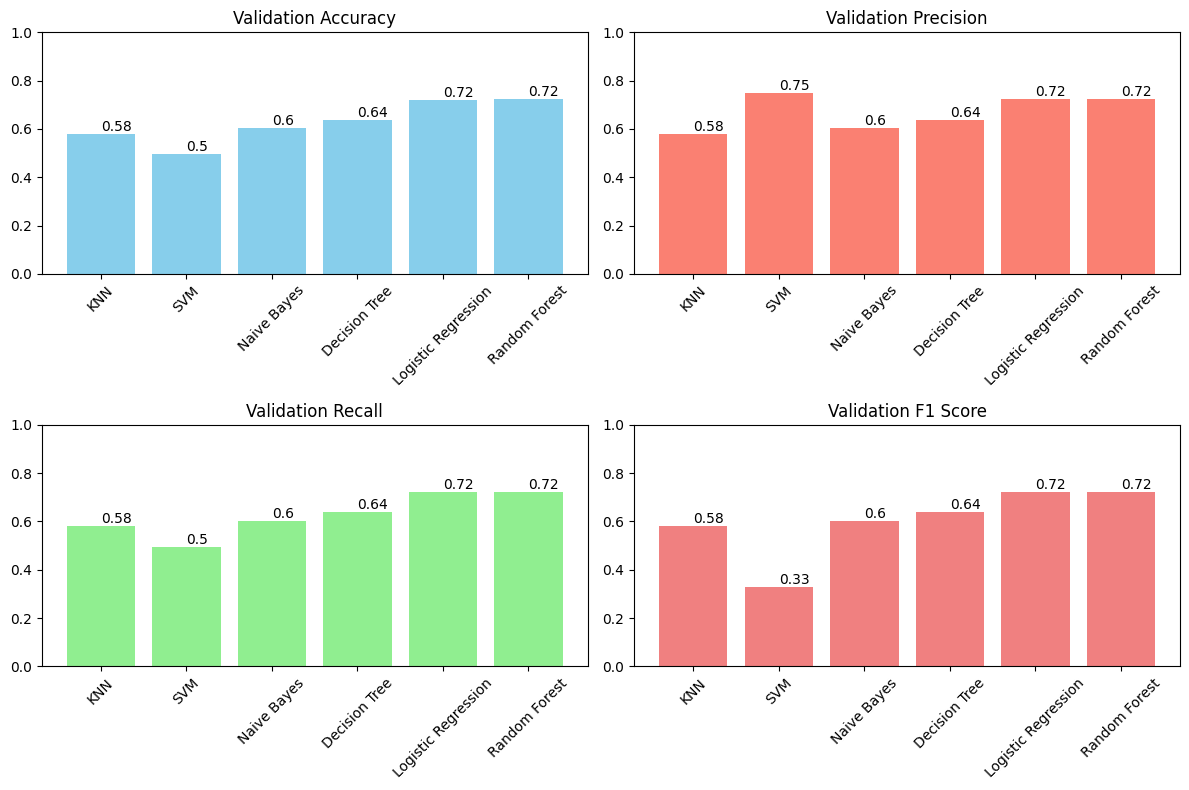

In [6]:
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(12, 8))

# Plot Validation Accuracy
plt.subplot(2, 2, 1)
bars = plt.bar(results_df['Model'], results_df['Validation Accuracy'], color='skyblue')
plt.title('Validation Accuracy')
plt.xticks(rotation=45)
plt.ylim(0, 1)

# Add labels for Validation Accuracy
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom')

# Plot Validation Precision
plt.subplot(2, 2, 2)
bars = plt.bar(results_df['Model'], results_df['Validation Precision'], color='salmon')
plt.title('Validation Precision')
plt.xticks(rotation=45)
plt.ylim(0, 1)

# Add labels for Validation Precision
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom')

# Plot Validation Recall
plt.subplot(2, 2, 3)
bars = plt.bar(results_df['Model'], results_df['Validation Recall'], color='lightgreen')
plt.title('Validation Recall')
plt.xticks(rotation=45)
plt.ylim(0, 1)

# Add labels for Validation Recall
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom')

# Plot Validation F1 Score
plt.subplot(2, 2, 4)
bars = plt.bar(results_df['Model'], results_df['Validation F1 Score'], color='lightcoral')
plt.title('Validation F1 Score')
plt.xticks(rotation=45)
plt.ylim(0, 1)

# Add labels for Validation F1 Score
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


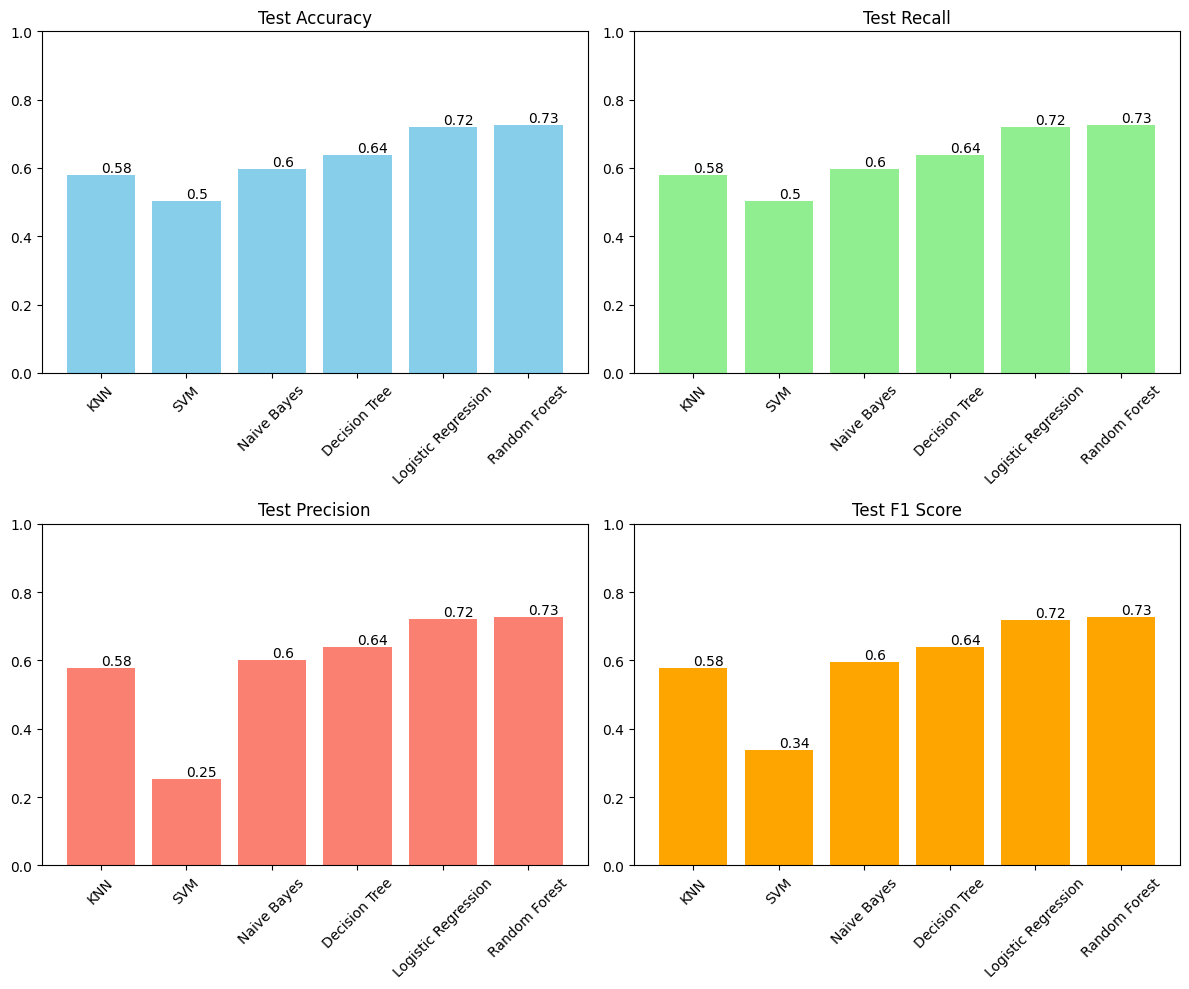

In [7]:
import matplotlib.pyplot as plt
import warnings

# Ignore warnings
warnings.filterwarnings("ignore")
# Set the figure size and create subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Plot Test Accuracy
bars1 = axs[0, 0].bar(results_df['Model'], results_df['Test Accuracy'], color='skyblue')
axs[0, 0].set_title('Test Accuracy')
axs[0, 0].set_xticklabels(results_df['Model'], rotation=45)
axs[0, 0].set_ylim(0, 1)

# Add labels for Test Accuracy
for bar in bars1:
    yval = bar.get_height()
    axs[0, 0].text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom')

# Plot Test Recall
bars2 = axs[0, 1].bar(results_df['Model'], results_df['Test Recall'], color='lightgreen')
axs[0, 1].set_title('Test Recall')
axs[0, 1].set_xticklabels(results_df['Model'], rotation=45)
axs[0, 1].set_ylim(0, 1)

# Add labels for Test Recall
for bar in bars2:
    yval = bar.get_height()
    axs[0, 1].text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom')

# Plot Test Precision
bars3 = axs[1, 0].bar(results_df['Model'], results_df['Test Precision'], color='salmon')
axs[1, 0].set_title('Test Precision')
axs[1, 0].set_xticklabels(results_df['Model'], rotation=45)
axs[1, 0].set_ylim(0, 1)

# Add labels for Test Precision
for bar in bars3:
    yval = bar.get_height()
    axs[1, 0].text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom')

# Plot Test F1 Score
bars4 = axs[1, 1].bar(results_df['Model'], results_df['Test F1 Score'], color='orange')
axs[1, 1].set_title('Test F1 Score')
axs[1, 1].set_xticklabels(results_df['Model'], rotation=45)
axs[1, 1].set_ylim(0, 1)

# Add labels for Test F1 Score
for bar in bars4:
    yval = bar.get_height()
    axs[1, 1].text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom')

# Adjust layout
plt.tight_layout()
plt.show()
